---
---

# Data Warehouse y análisis exploratorio de datos.

---
---

Nicolás De la Fuente

## 0.- Cargar librerías y explicar sus usos 

Respuesta:
---
Se importarán las librerías de pandas, numpy, maltplotlib, seaborn y sklearn. La librería pandas se utilizará para el manejo, visualización y limpieza de los dataframe. La librería numpy puede ser usada para análisis extras de tendencia y visualización de datos. Las librerías matplotlib y seaborn, son dos librerías que van de la mano, utilizadas para preparar y personalizar gráficos. Por último, la librería sklearn la utilizaremos para la normalización de los datos. tuve problemas al importar la librería seaborn, no entiendo el porque, pero buscando en foros me recomendaron que en el mismo notebook hiciera la instalación con pip de la lib, no se para que anteponen el %, pero eso me funciono.os.


In [1]:
%pip install seaborn

In [2]:
import pandas as pd

In [3]:
import numpy as nu

In [4]:
from sklearn import preprocessing as sk

In [5]:
import matplotlib as pl

In [6]:
import seaborn as sb

## 1.- Cargar datasets y explorar los datos. Explicar las características de los dataset (estaísticas, datos Nan, datos únicos, etc.)

Empezaremos cargando los archivos "CSV" utilizando el metodo "read.csv()" de pandas, estos nos generará 3 dataframe de datos que llamaremos setA, setB y setC, al leer los archivos nos daremos cuenta que dos están separados por "," y uno con ";".

Luego, haremos la visualización y caracterización de los datos, para lo cual, utilizaremos los métodos ".head()", ".describe()", ".columns", ".dtypes", "pd.isna(df).sum()" y "df[df.duplicated(keep=False)]".

".head()" nos permitirá visualizar las primeras “x” filas del dataframe.
".describe()" nos generará una tabla con distintos datos estadísticos asociados a cada columna del dataframe, los datos entregados serán distintos según el tipo de dato en cada atributo (obj o int).
".columns" nos entregará una lista con los nombres de todas las columnas del dataframe.
".dtypes" nos mostrará el tipo de dato de cada atributo.
"pd.isna(df).sum()" nos entregará una lista con la sumatoria de los datos "NaN" en cada atributo.
"df[df.duplicated(keep=False)]" nos generará una tabla con todas las filas repetidas en nuestro dataframe, en caso de no haber filas repetidas nos entregará una tabla vacía.

Rápidamente podemos observar que no hay filas repetidas en ninguno de los dataframe. que presentan atributos en común como son "Unnamed: 0", "id", "age" y 'day_of_week'. Que los atributos "age" y 'day_of_week' tienen elementos NaN, que hay algunos elementos categóricos como los atributos "marital" o "education" y que algunos atributos tienen una distribución extraña como "pdays", que va desde el valor 3 a 999, con promedio de 979 y mediana de 999.


In [7]:
setA = pd.read_csv("bank-A.csv", sep = ";")

In [8]:
setB = pd.read_csv("bank-B.csv")

In [9]:
setC = pd.read_csv("bank-C.csv")

## Exploración y caracterisación de SetA (bank-A)

In [10]:
setA.head(10)

,Unnamed: 0,id,age,job,marital,education,default,housing,day_of_week
0,2292,2292,51.0,entrepreneur,divorced,university.degree,no,yes,mon
1,1536,1536,37.0,management,married,university.degree,no,yes,tue
2,4047,4047,38.0,blue-collar,married,basic.4y,unknown,no,wed
3,3862,3862,NaN,technician,married,professional.course,no,yes,fri
4,1340,1340,32.0,admin.,married,university.degree,no,yes,NaN
5,3686,3686,45.0,technician,married,basic.9y,unknown,no,fri
6,1565,1565,38.0,admin.,single,university.degree,no,yes,mon
7,3186,3186,54.0,admin.,married,high.school,unknown,yes,mon
8,3588,3588,30.0,admin.,divorced,university.degree,no,no,tue
9,3441,3441,41.0,admin.,divorced,high.school,no,no,mon


In [11]:
setA.describe(include = "all")

,Unnamed: 0,id,age,job,marital,education,default,housing,day_of_week
count,50.000000,50.000000,42.000000,50,50,50,50,50,42
unique,NaN,NaN,NaN,8,3,7,2,3,5
top,NaN,NaN,NaN,blue-collar,married,university.degree,no,yes,wed
freq,NaN,NaN,NaN,13,29,15,37,27,11
mean,2461.900000,2461.900000,40.357143,NaN,NaN,NaN,NaN,NaN,NaN
std,1047.344129,1047.344129,9.084485,NaN,NaN,NaN,NaN,NaN,NaN
min,257.000000,257.000000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1553.750000,1553.750000,31.250000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2486.000000,2486.000000,38.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,3407.000000,3407.000000,48.500000,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
setA.describe()

,Unnamed: 0,id,age
count,50.000000,50.000000,42.000000
mean,2461.900000,2461.900000,40.357143
std,1047.344129,1047.344129,9.084485
min,257.000000,257.000000,27.000000
25%,1553.750000,1553.750000,31.250000
50%,2486.000000,2486.000000,38.000000
75%,3407.000000,3407.000000,48.500000
max,4047.000000,4047.000000,57.000000


In [13]:
setA["Unnamed: 0"].median()

2486.0

In [14]:
setA.describe(include = "object")

,job,marital,education,default,housing,day_of_week
count,50,50,50,50,50,42
unique,8,3,7,2,3,5
top,blue-collar,married,university.degree,no,yes,wed
freq,13,29,15,37,27,11


In [15]:
setA.columns

Index(['Unnamed: 0', 'id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'day_of_week'],
      dtype='object')

In [16]:
setA.dtypes

Unnamed: 0       int64
id               int64
age            float64
job             object
marital         object
education       object
default         object
housing         object
day_of_week     object
dtype: object

In [17]:
pd.isna(setA).sum()

Unnamed: 0     0
id             0
age            8
job            0
marital        0
education      0
default        0
housing        0
day_of_week    8
dtype: int64

El siguiente codigo nos permite visualizar filas duplicadas. 
En este caso no hay duplicación de filas

In [18]:
setA[setA.duplicated(keep=False)]

,Unnamed: 0,id,age,job,marital,education,default,housing,day_of_week


## Exploración y caracterisación de SetB (bank-B)

In [19]:
setB.head(10)

,Unnamed: 0,id,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,age
0,2292,2292,telephone,may,mon,231,1,999,1,failure,51.0
1,1536,1536,cellular,aug,tue,263,2,999,0,nonexistent,37.0
2,4047,4047,telephone,jun,wed,95,2,999,0,nonexistent,38.0
3,3862,3862,cellular,nov,fri,495,1,3,1,success,52.0
4,1340,1340,cellular,aug,wed,428,4,999,0,nonexistent,NaN
5,3686,3686,-,nov,fri,174,1,999,0,nonexistent,45.0
6,1565,1565,telephone,jul,mon,195,2,999,0,nonexistent,38.0
7,3186,3186,telephone,jun,None,490,12,999,0,nonexistent,54.0
8,3588,3588,cellular,nov,tue,198,1,999,0,nonexistent,30.0
9,3441,3441,telephone,may,mon,177,4,999,0,nonexistent,41.0


In [20]:
setB.describe(include = "all")

,Unnamed: 0,id,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,age
count,50.000000,50.000000,50,50,50,50.000000,50.000000,50.000000,50.000000,50,42.000000
unique,NaN,NaN,3,6,6,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,cellular,may,wed,NaN,NaN,NaN,NaN,nonexistent,NaN
freq,NaN,NaN,26,20,13,NaN,NaN,NaN,NaN,44,NaN
mean,2461.900000,2461.900000,NaN,NaN,NaN,270.100000,2.280000,979.080000,0.120000,NaN,40.880952
std,1047.344129,1047.344129,NaN,NaN,NaN,204.363147,1.917056,140.855671,0.328261,NaN,9.292542
min,257.000000,257.000000,NaN,NaN,NaN,68.000000,1.000000,3.000000,0.000000,NaN,26.000000
25%,1553.750000,1553.750000,NaN,NaN,NaN,160.250000,1.000000,999.000000,0.000000,NaN,33.000000
50%,2486.000000,2486.000000,NaN,NaN,NaN,198.500000,2.000000,999.000000,0.000000,NaN,38.000000
75%,3407.000000,3407.000000,NaN,NaN,NaN,303.750000,3.000000,999.000000,0.000000,NaN,50.500000


In [21]:
setB.describe()

,Unnamed: 0,id,duration,campaign,pdays,previous,age
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,42.000000
mean,2461.900000,2461.900000,270.100000,2.280000,979.080000,0.120000,40.880952
std,1047.344129,1047.344129,204.363147,1.917056,140.855671,0.328261,9.292542
min,257.000000,257.000000,68.000000,1.000000,3.000000,0.000000,26.000000
25%,1553.750000,1553.750000,160.250000,1.000000,999.000000,0.000000,33.000000
50%,2486.000000,2486.000000,198.500000,2.000000,999.000000,0.000000,38.000000
75%,3407.000000,3407.000000,303.750000,3.000000,999.000000,0.000000,50.500000
max,4047.000000,4047.000000,1259.000000,12.000000,999.000000,1.000000,57.000000


In [22]:
setB.columns

Index(['Unnamed: 0', 'id', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'age'],
      dtype='object')

In [23]:
setB.dtypes

Unnamed: 0       int64
id               int64
contact         object
month           object
day_of_week     object
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome        object
age            float64
dtype: object

In [24]:
pd.isna(setB).sum()

Unnamed: 0     0
id             0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
age            8
dtype: int64

In [25]:
setB[setB.duplicated(keep=False)]

,Unnamed: 0,id,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,age


## Exploración y caracterisación de SetC (bank-C)

In [26]:
setC.head(10)

,Unnamed: 0,id,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact
0,2292,2292,-1.8,92.893,-46.2,1.299,5099.1,telephone
1,1536,1536,1.4,93.444,-36.1,4.968,5228.1,NO INFO
2,4047,4047,1.4,94.465,-41.8,4.959,5228.1,telephone
3,3862,3862,-3.4,92.649,-30.1,0.714,5017.5,cellular
4,1340,1340,1.4,93.444,-36.1,4.964,5228.1,cellular
5,3686,3686,-0.1,93.200,-42.0,4.021,5195.8,cellular
6,1565,1565,-2.9,92.469,-33.6,0.914,5076.2,telephone
7,3186,3186,1.4,94.465,-41.8,4.865,5228.1,telephone
8,3588,3588,-0.1,93.200,-42.0,4.153,5195.8,cellular
9,3441,3441,1.1,93.994,-36.4,4.857,5191.0,telephone


In [27]:
setC.describe(include = "all")

,Unnamed: 0,id,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cellular
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
mean,2461.900000,2461.900000,0.324000,93.588360,-40.062000,3.965080,5181.00800,NaN
std,1047.344129,1047.344129,1.392188,0.514534,4.143295,1.532579,57.86105,NaN
min,257.000000,257.000000,-3.400000,92.469000,-47.100000,0.697000,5008.70000,NaN
25%,1553.750000,1553.750000,-0.100000,93.200000,-42.700000,4.087000,5191.00000,NaN
50%,2486.000000,2486.000000,1.100000,93.660000,-41.800000,4.857000,5195.80000,NaN
75%,3407.000000,3407.000000,1.400000,93.994000,-36.400000,4.960500,5228.10000,NaN


In [28]:
setC.describe()

,Unnamed: 0,id,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,2461.900000,2461.900000,0.324000,93.588360,-40.062000,3.965080,5181.00800
std,1047.344129,1047.344129,1.392188,0.514534,4.143295,1.532579,57.86105
min,257.000000,257.000000,-3.400000,92.469000,-47.100000,0.697000,5008.70000
25%,1553.750000,1553.750000,-0.100000,93.200000,-42.700000,4.087000,5191.00000
50%,2486.000000,2486.000000,1.100000,93.660000,-41.800000,4.857000,5195.80000
75%,3407.000000,3407.000000,1.400000,93.994000,-36.400000,4.960500,5228.10000
max,4047.000000,4047.000000,1.400000,94.465000,-30.100000,4.968000,5228.10000


In [29]:
setC.dtypes

Unnamed: 0          int64
id                  int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
contact            object
dtype: object

In [30]:
setC.columns

Index(['Unnamed: 0', 'id', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'contact'],
      dtype='object')

In [31]:
pd.isna(setC).sum()

Unnamed: 0        0
id                0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
contact           0
dtype: int64

In [32]:
setC[setC.duplicated(keep=False)]

,Unnamed: 0,id,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact


## 2.- Generar dos graficos que caractericen los datos y explicarlos


En la siguiente etapa, graficamos los datos obtenidos para evaluar su integridad y calidad.
Como en el punto anterior vimos que "pdays" del df "setB" presenta una distribución extraña, decidimos graficarlo para observar mejor, utilizamos un gráfico de distribución construido con las librerías de seaborn y matplotlib para visualizar. Efectivamente se ve un sesgo en la distribución de los datos donde la mayoría de los datos están cargados al valor 999, recordar que este atributo mide los días que han pasado desde la última vez que se contactó a la persona y donde el valor 999 representa a todos los contactos por primera vez.

luego quise ver si existía alguna relación entre la edad de los clientes y su nivel de educación, para lo cual graficamos los atributos "age" y "education" del setA en un boxplot. vemos rápidamente que quienes poseen una grado universitario suelen ser más jóvenes rondando los 34 años y que quienes tienen el nivel de high school rondan los 42 o 43 años, el resto de los datos presentan distribución muy amplia y poco datos para ver una posible tendencia, también podemos ver que desconocemos el nivel de educación de una perso

Por último utilizando el método "value_counts()", vemos cuantos registros tenemos por cada categoría de nivel de educación, nos damos cuenta que tenemos 3 registros para nivel de basic.6y pero solo uno está representado en el gráfico. Luego observamos el atributo de edad y vemos que dos de los 3 registros con nivel de basic.6y tienen como edad "NaN", por lo cual no fueron considerados en el gráfico.
a.


<ipython-input-33-58bcabd5b10e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(a=setB['pdays'])


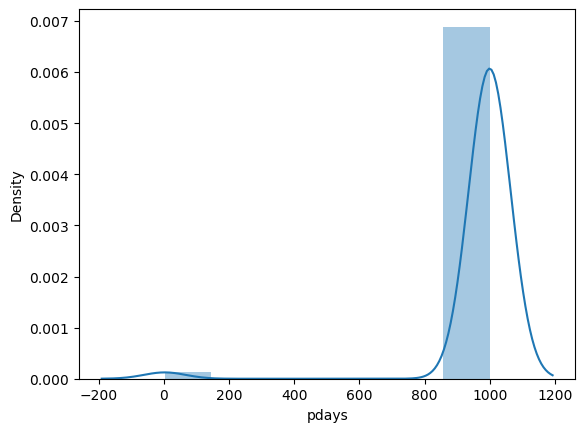

In [33]:
sb.distplot(a=setB['pdays'])
pl.pyplot.show()

In [34]:
setB.value_counts('pdays')

pdays
999    49
3       1
dtype: int64

### Segundo Grafico

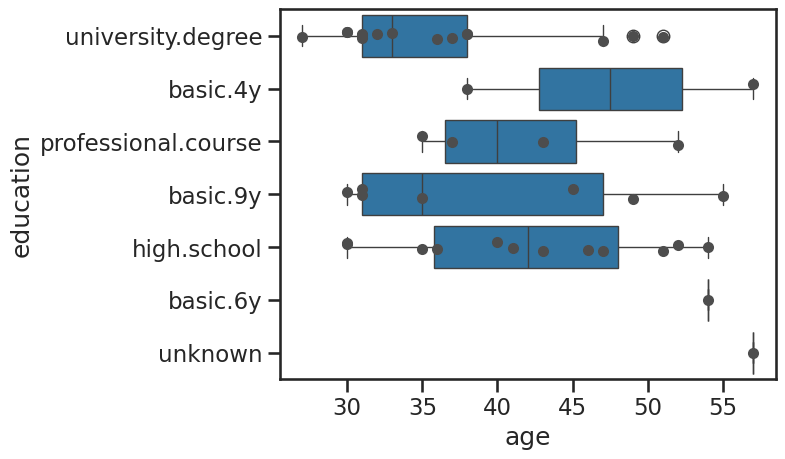

In [35]:
sb.set_theme(style="ticks", context = "talk", palette = "tab10")
sb.boxplot(data = setA, x = "age", y = "education" )
sb.stripplot(setA, x = "age", y = "education", size=8, color=".3")
pl.pyplot.show()

In [36]:
setA.value_counts("education")

education
university.degree      15
high.school            14
basic.9y                8
professional.course     5
basic.4y                4
basic.6y                3
unknown                 1
dtype: int64

In [37]:
setA.loc[setA['education']=="basic.6y"]

,Unnamed: 0,id,age,job,marital,education,default,housing,day_of_week
15,3948,3948,54.0,blue-collar,married,basic.6y,unknown,no,wed
31,3321,3321,NaN,blue-collar,divorced,basic.6y,no,yes,fri
46,3912,3912,NaN,blue-collar,married,basic.6y,unknown,yes,fri


In [38]:
setA.loc[setA['education']=="unknown"]

,Unnamed: 0,id,age,job,marital,education,default,housing,day_of_week
16,257,257,57.0,blue-collar,married,unknown,unknown,yes,tue


## 3.- Unir datasets, explicar el tipo de unión y atributo escogido para la unión 
## Complementar información entre atributos, eliminar atributos innecesarios. Explicar las decisiones tomadas

Luego uní los tres dataframe utilizando el método "merge()" de pandas, para lo cual, usamos el atributo único presente en los 3 dataframe de "id", ya que "id" tiene un valor único para cada registro con concordancia en los otros dataframe, también se pudo haber utilizado el atributo "Unnamed: 0" que es lo mismo que el id en estas df.
y usamos el método "head()" para visualizar la unión de los d nombrada como "setABC"f


In [39]:
setAB = pd.merge(setA, setB, left_on="id", right_on="id")
setAB.head()

,Unnamed: 0_x,id,age_x,job,marital,education,default,housing,day_of_week_x,Unnamed: 0_y,contact,month,day_of_week_y,duration,campaign,pdays,previous,poutcome,age_y
0,2292,2292,51.0,entrepreneur,divorced,university.degree,no,yes,mon,2292,telephone,may,mon,231,1,999,1,failure,51.0
1,1536,1536,37.0,management,married,university.degree,no,yes,tue,1536,cellular,aug,tue,263,2,999,0,nonexistent,37.0
2,4047,4047,38.0,blue-collar,married,basic.4y,unknown,no,wed,4047,telephone,jun,wed,95,2,999,0,nonexistent,38.0
3,3862,3862,NaN,technician,married,professional.course,no,yes,fri,3862,cellular,nov,fri,495,1,3,1,success,52.0
4,1340,1340,32.0,admin.,married,university.degree,no,yes,NaN,1340,cellular,aug,wed,428,4,999,0,nonexistent,NaN


In [40]:
setABC = pd.merge(setAB, setC, left_on="id", right_on="id")
setABC.head()

,Unnamed: 0_x,id,age_x,job,marital,education,default,housing,day_of_week_x,Unnamed: 0_y,...,previous,poutcome,age_y,Unnamed: 0,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact_y
0,2292,2292,51.0,entrepreneur,divorced,university.degree,no,yes,mon,2292,...,1,failure,51.0,2292,-1.8,92.893,-46.2,1.299,5099.1,telephone
1,1536,1536,37.0,management,married,university.degree,no,yes,tue,1536,...,0,nonexistent,37.0,1536,1.4,93.444,-36.1,4.968,5228.1,NO INFO
2,4047,4047,38.0,blue-collar,married,basic.4y,unknown,no,wed,4047,...,0,nonexistent,38.0,4047,1.4,94.465,-41.8,4.959,5228.1,telephone
3,3862,3862,NaN,technician,married,professional.course,no,yes,fri,3862,...,1,success,52.0,3862,-3.4,92.649,-30.1,0.714,5017.5,cellular
4,1340,1340,32.0,admin.,married,university.degree,no,yes,NaN,1340,...,0,nonexistent,NaN,1340,1.4,93.444,-36.1,4.964,5228.1,cellular


## 4.- Transformar a formato pedido en tabla output.csv, el resultado debe quedar igual a la tabla presentada en el archivo output.csv


   
4.1) Continuamos haciendo la limpieza del df "setABC". Primero usó el método "columns" para ver los atributos que se han duplicado por la unión de los df, luego con el método "drop" y entregando una lista con las columnas repetidas, las eliminó del df y confirmó con el método "columns".

4.2) Viisualizamos la data nuevamente, usamos las funciones "head", "describe" y "isna", y vemos que los atributos "age_x" y "day_of_week_x" tienen 8 valores NaN. primero usamos el método “where” de numpy en conjunto con el metodo "is.na" para reemplazar exclusivamente los valores NaN por el promedio de la edad y por la mediana(este quedará en comentario), luego confirmamos mediante la suma de los valores NaN y tenemos 0, finalizamos observando el cambio de la distribución de las edades al reemplazar los valores NaN por el promedio y la medina, comparándola con los valores originales. Observe que la distribución mejora en ambos casos pero se ve mejor al reemplazar con el promedio, por lo cual continué con él y quedando el cambio por la media en comentarios.

Luego vemos el atributo "day_of_week_x", corresponde al dia de la semana que se realiza el registro, esto va de lunes a viernes. Para eliminar los valores NaN aqui use el método "fillna()" que reemplaza los valores NaN. En este caso, al especificar en sus argumentos que el método a usar es el "ffill", este reemplazara el valor NaN por el registro anterior, de esta forma si tenemos la secuencia mon-NaN-fri quedará como mom-mom-fri. Luego cercioramos usando la sumatoria del método "isna" = 0, y por último, vemos como varía la cantidad de registros de cada día posterior a la limpieza.

4.3) Seguimos haciendo la corrección del formato del df según el archivo "output.csv", empezamos usando el método .columnas para comparar los atributos en cada df. Se observa que el archivo "output" tiene dos columnas extras, que no están en nuestros data sets originales ("loan" y "y"), estas columnas no se tomarán en consideración en el formato del archivo de salida. Luego usamos una lista de los atributos ordenados según el archivo output para ordenar nuestro dataframe, también usamos el método rename para renombrar los encabezados de las columnas. Vemos que en el archivo output la edad tiene al final la palabra "years", así que lo corregimos en nuestro setABC concatenando el valor del atributo "age"+ " " + " years" y reemplazando. también observamos que en "education" algunos datos están con "." y en el archivo output están con " ", así que con el método replace cambiamos los puntos por espacios, de la misma forma cambiamos el valor de unknow del atributo "default" por un espacio vacío. Por último usando el método unique() para comparar los formatos de los atributos categóricos de 'day_of_week', 'month' y 'poutcome', nuevamente usamos el método "replace" pero esta vez le entregamos un diccionario para que realizar el cambio de fo

4.4) Continuamos con la normalización de los datos, primero usó el método "describe" para ver los datos tipo “int” del df setABC, de estos atributos excluye las columnas 'Unnamed: 0' y 'id' ya que estas representan un código único para cada registro y una posición. Utilizo dos métodos de normalización "MinMax" y "StandardScaler" del paquete sklears. MinMax normaliza los datos considerando el valor mínimo y máximo del set de datos, entregando valores entre 0 y 1. En cambio "StandardScaler" normaliza los datos al restarle el promedio y dividiendo por la varianza, puede dar números tanto positivos como negativos en un escala mucho más pequeña. luego grafico para hacer las comparaciones en las distribuciones de mis datos brutos, mis datos normalizados entre "MinMax" y los normalizados por medio de "StandardScaler", vemos que en los datos brutos claramente no están en la misma escala, sesgando completamente la distribución y viendo líneas rectas, con el método "MinMax" ya podemos observar la formación de campanas de gauss y con el método "StandardScaler" las campanas de gauss se ven mucho más definidas y alineadas en la misma escala. Por lo cual, decido continuar con los datos normalizados por "StandardScaler", que agrego mediante la concatenación de dataframe y generando el dataframe final "setFinal", los atributos normalizados se agregaron con el mismo nombre original de atributo anteponiendo "SS_" al nombre (ej: "SS_euribor3m").rmato.
  thu

## 4.1 Limpieza de columna repetidas

In [41]:
setABC.columns

Index(['Unnamed: 0_x', 'id', 'age_x', 'job', 'marital', 'education', 'default',
       'housing', 'day_of_week_x', 'Unnamed: 0_y', 'contact_x', 'month',
       'day_of_week_y', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'age_y', 'Unnamed: 0', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'contact_y'],
      dtype='object')

In [42]:
setABC = setABC.drop(columns = ['Unnamed: 0_y','day_of_week_y','age_y','Unnamed: 0','contact_y'])

In [43]:
setABC.columns

Index(['Unnamed: 0_x', 'id', 'age_x', 'job', 'marital', 'education', 'default',
       'housing', 'day_of_week_x', 'contact_x', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [44]:
setABC.head()

,Unnamed: 0_x,id,age_x,job,marital,education,default,housing,day_of_week_x,contact_x,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,2292,2292,51.0,entrepreneur,divorced,university.degree,no,yes,mon,telephone,...,231,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
1,1536,1536,37.0,management,married,university.degree,no,yes,tue,cellular,...,263,2,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1
2,4047,4047,38.0,blue-collar,married,basic.4y,unknown,no,wed,telephone,...,95,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
3,3862,3862,NaN,technician,married,professional.course,no,yes,fri,cellular,...,495,1,3,1,success,-3.4,92.649,-30.1,0.714,5017.5
4,1340,1340,32.0,admin.,married,university.degree,no,yes,NaN,cellular,...,428,4,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1


In [45]:
setABC.describe(include="all")

,Unnamed: 0_x,id,age_x,job,marital,education,default,housing,day_of_week_x,contact_x,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,50.000000,50.000000,42.000000,50,50,50,50,50,42,50,...,50.000000,50.000000,50.000000,50.000000,50,50.000000,50.000000,50.000000,50.000000,50.00000
unique,NaN,NaN,NaN,8,3,7,2,3,5,3,...,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,blue-collar,married,university.degree,no,yes,wed,cellular,...,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,13,29,15,37,27,11,26,...,NaN,NaN,NaN,NaN,44,NaN,NaN,NaN,NaN,NaN
mean,2461.900000,2461.900000,40.357143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,270.100000,2.280000,979.080000,0.120000,NaN,0.324000,93.588360,-40.062000,3.965080,5181.00800
std,1047.344129,1047.344129,9.084485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,204.363147,1.917056,140.855671,0.328261,NaN,1.392188,0.514534,4.143295,1.532579,57.86105
min,257.000000,257.000000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.000000,1.000000,3.000000,0.000000,NaN,-3.400000,92.469000,-47.100000,0.697000,5008.70000
25%,1553.750000,1553.750000,31.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,160.250000,1.000000,999.000000,0.000000,NaN,-0.100000,93.200000,-42.700000,4.087000,5191.00000
50%,2486.000000,2486.000000,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,198.500000,2.000000,999.000000,0.000000,NaN,1.100000,93.660000,-41.800000,4.857000,5195.80000
75%,3407.000000,3407.000000,48.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,303.750000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.960500,5228.10000


## 4.2 Limpieza de valores NaN

In [46]:
pd.isna(setABC).sum()

Unnamed: 0_x      0
id                0
age_x             8
job               0
marital           0
education         0
default           0
housing           0
day_of_week_x     8
contact_x         0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [47]:
setClean = setABC.copy()
#setClean["age_x"] = nu.where(pd.isna(setClean["age_x"]), setClean["age_x"].quantile(q=0.5), setClean["age_x"]) 
setClean["age_x"] = nu.where(pd.isna(setClean["age_x"]), setClean["age_x"].mean(), setClean["age_x"])

In [48]:
pd.isna(setClean["age_x"]).sum()

0

<ipython-input-49-071c6124b934>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(a=setABC["age_x"])


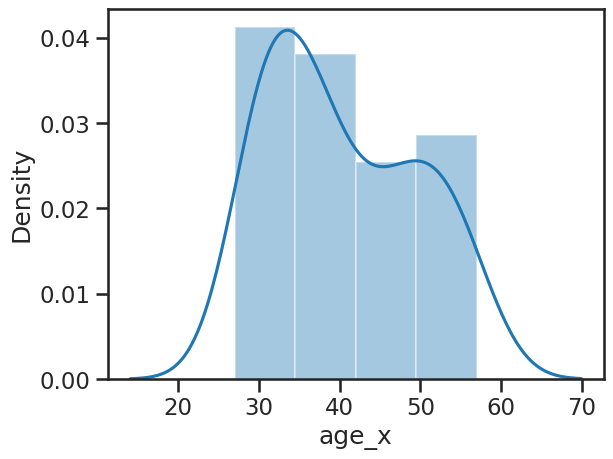

In [49]:
sb.distplot(a=setABC["age_x"])
pl.pyplot.show()

<ipython-input-50-98b6b71c0c35>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(a=setClean["age_x"])


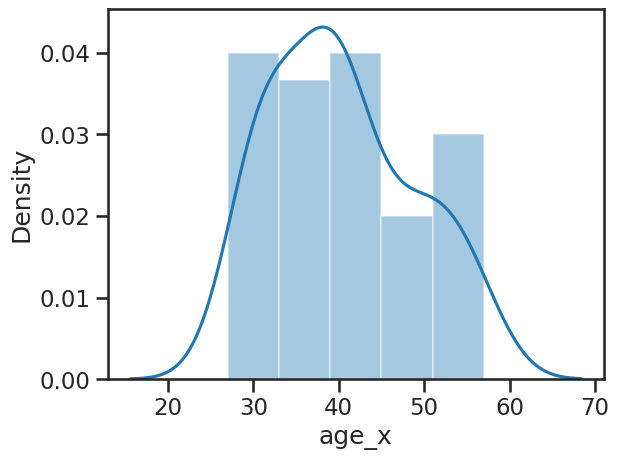

In [50]:
sb.distplot(a=setClean["age_x"])
pl.pyplot.show()

In [51]:
setClean["day_of_week_x"]

0     mon
1     tue
2     wed
3     fri
4     NaN
5     fri
6     mon
7     mon
8     tue
9     mon
10    thu
11    tue
12    NaN
13    mon
14    wed
15    wed
16    tue
17    mon
18    thu
19    thu
20    fri
21    mon
22    NaN
23    fri
24    thu
25    fri
26    wed
27    NaN
28    wed
29    tue
30    wed
31    fri
32    NaN
33    thu
34    wed
35    mon
36    fri
37    thu
38    NaN
39    thu
40    mon
41    wed
42    NaN
43    wed
44    fri
45    thu
46    fri
47    NaN
48    wed
49    wed
Name: day_of_week_x, dtype: object

In [52]:
setClean["day_of_week_x"].value_counts()

wed    11
mon     9
fri     9
thu     8
tue     5
Name: day_of_week_x, dtype: int64

In [53]:
setClean["day_of_week_x"].fillna(inplace = True, method="ffill", limit = 1)

In [54]:
pd.isna(setClean["day_of_week_x"]).sum()

0

In [55]:
setClean["day_of_week_x"].value_counts()

wed    13
fri    12
mon    10
thu     9
tue     6
Name: day_of_week_x, dtype: int64

In [56]:
pd.isna(setClean).sum()

Unnamed: 0_x      0
id                0
age_x             0
job               0
marital           0
education         0
default           0
housing           0
day_of_week_x     0
contact_x         0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

## 4.3 Corrección formato según archivo "output.csv"

In [57]:
output = pd.read_csv("output.csv")

In [58]:
output.columns

Index(['Unnamed: 0', 'id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [59]:
setClean.columns

Index(['Unnamed: 0_x', 'id', 'age_x', 'job', 'marital', 'education', 'default',
       'housing', 'day_of_week_x', 'contact_x', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [60]:
setClean = setClean[['Unnamed: 0_x', 'id', 'age_x', 'job', 'marital', 'education', 'default',
       'housing', 'contact_x', 'month','day_of_week_x', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

In [61]:
encabezadosNuevos = {'Unnamed: 0_x': 'Unnamed: 0', 'age_x':'age' , 'contact_x': 'contact','day_of_week_x': 'day_of_week'}

In [62]:
setClean = setClean.rename(columns=encabezadosNuevos)

In [63]:
setClean.columns

Index(['Unnamed: 0', 'id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [64]:
setClean["age"] = (setClean["age"].astype(int)).astype(str)+ " " + "years"

In [65]:
setClean["education"] = setClean["education"].str.replace(".", " ")

<ipython-input-65-2799359a0ef0>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  setClean["education"] = setClean["education"].str.replace(".", " ")


In [66]:
setClean["default"] = setClean["default"].str.replace("unknown", " ")

In [67]:
output["month"].unique()

array(['may', 'august', 'june', 'november', 'july', 'april'], dtype=object)

In [68]:
setClean["month"].unique()

array(['may', 'aug', 'jun', 'nov', 'jul', 'apr'], dtype=object)

In [69]:
setClean["month"] = setClean["month"].replace({'aug':'august', 'jun':'june','nov':'november', 'jul':'july', 'apr':'april'})

In [70]:
output['day_of_week'].unique()

array(['monday', 'tuesday', 'wednesday', 'friday', 'thursday'],
      dtype=object)

In [71]:
setClean['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'fri', 'thu'], dtype=object)

In [72]:
setClean['day_of_week'] = setClean['day_of_week'].replace({'mon':'monday', 'tue':'tuesday','wed':'wednesday', 'fri':'friday', 'thu':'thursday'})

In [73]:
output['poutcome'].unique()

array(['failure', 'not existent', 'success'], dtype=object)

In [74]:
setClean['poutcome'].unique()

array(['failure', 'nonexistent', 'success'], dtype=object)

In [75]:
setClean['poutcome'] = setClean['poutcome'].replace({'nonexistent':'not existent'})

In [76]:
output.head()

,Unnamed: 0,id,age,job,marital,education,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,2292,2292,51 years,entrepreneur,divorced,university degree,no,yes,no,telephone,...,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no
1,1536,1536,37 years,management,married,university degree,no,yes,no,cellular,...,2,999,0,not existent,1.4,93.444,-36.1,4.968,5228.1,no
2,4047,4047,38 years,blue-collar,married,basic 4y,,no,no,telephone,...,2,999,0,not existent,1.4,94.465,-41.8,4.959,5228.1,no
3,3862,3862,52 years,technician,married,professional course,no,yes,no,cellular,...,1,3,1,success,-3.4,92.649,-30.1,0.714,5017.5,yes
4,1340,1340,32 years,admin.,married,university degree,no,yes,no,cellular,...,4,999,0,not existent,1.4,93.444,-36.1,4.964,5228.1,no


In [77]:
setClean.head()

,Unnamed: 0,id,age,job,marital,education,default,housing,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,2292,2292,51 years,entrepreneur,divorced,university degree,no,yes,telephone,may,...,231,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
1,1536,1536,37 years,management,married,university degree,no,yes,cellular,august,...,263,2,999,0,not existent,1.4,93.444,-36.1,4.968,5228.1
2,4047,4047,38 years,blue-collar,married,basic 4y,,no,telephone,june,...,95,2,999,0,not existent,1.4,94.465,-41.8,4.959,5228.1
3,3862,3862,40 years,technician,married,professional course,no,yes,cellular,november,...,495,1,3,1,success,-3.4,92.649,-30.1,0.714,5017.5
4,1340,1340,32 years,admin.,married,university degree,no,yes,cellular,august,...,428,4,999,0,not existent,1.4,93.444,-36.1,4.964,5228.1


## 4.4 Normalización de datos

## 4.4.1 Normalización por valor Minimo y Maximo

In [78]:
setClean.describe()

,Unnamed: 0,id,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,2461.900000,2461.900000,270.100000,2.280000,979.080000,0.120000,0.324000,93.588360,-40.062000,3.965080,5181.00800
std,1047.344129,1047.344129,204.363147,1.917056,140.855671,0.328261,1.392188,0.514534,4.143295,1.532579,57.86105
min,257.000000,257.000000,68.000000,1.000000,3.000000,0.000000,-3.400000,92.469000,-47.100000,0.697000,5008.70000
25%,1553.750000,1553.750000,160.250000,1.000000,999.000000,0.000000,-0.100000,93.200000,-42.700000,4.087000,5191.00000
50%,2486.000000,2486.000000,198.500000,2.000000,999.000000,0.000000,1.100000,93.660000,-41.800000,4.857000,5195.80000
75%,3407.000000,3407.000000,303.750000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.960500,5228.10000
max,4047.000000,4047.000000,1259.000000,12.000000,999.000000,1.000000,1.400000,94.465000,-30.100000,4.968000,5228.10000


In [79]:
mm_Norm = sk.MinMaxScaler()

In [80]:
set_Input = setClean[["duration", "campaign","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]]

In [81]:
col_names_MM = ["MM_duration", "MM_campaign","MM_pdays","MM_previous","MM_emp.var.rate","MM_cons.price.idx","MM_cons.conf.idx","MM_euribor3m","MM_nr.employed"]

In [82]:
set_Norm_MM = mm_Norm.fit_transform(set_Input)

In [83]:
set_Norm_MM = pd.DataFrame(set_Norm_MM, columns = col_names_MM)

In [84]:
set_Norm_MM.head()

,MM_duration,MM_campaign,MM_pdays,MM_previous,MM_emp.var.rate,MM_cons.price.idx,MM_cons.conf.idx,MM_euribor3m,MM_nr.employed
0,0.136860,0.000000,1.0,1.0,0.333333,0.212425,0.052941,0.140951,0.412033
1,0.163728,0.090909,1.0,0.0,1.000000,0.488477,0.647059,1.000000,1.000000
2,0.022670,0.090909,1.0,0.0,1.000000,1.000000,0.311765,0.997893,1.000000
3,0.358522,0.000000,0.0,1.0,0.000000,0.090180,1.000000,0.003980,0.040109
4,0.302267,0.272727,1.0,0.0,1.000000,0.488477,0.647059,0.999063,1.000000


## 4.4.2 Normalización por Standard Scaler

In [85]:
ss_Norm = sk.StandardScaler()

In [86]:
col_names_SS = ["SS_duration", "SS_campaign","SS_pdays","SS_previous","SS_emp.var.rate","SS_cons.price.idx","SS_cons.conf.idx","SS_euribor3m","SS_nr.employed"]

In [87]:
set_Norm_SS = ss_Norm.fit_transform(set_Input)

In [88]:
set_Norm_SS = pd.DataFrame(set_Norm_SS, columns=col_names_SS)

In [89]:
set_Norm_SS.head()

,SS_duration,SS_campaign,SS_pdays,SS_previous,SS_emp.var.rate,SS_cons.price.idx,SS_cons.conf.idx,SS_euribor3m,SS_nr.employed
0,-0.193269,-0.674469,0.142857,2.708013,-1.541145,-1.365158,-1.496470,-1.757265,-1.429970
1,-0.035095,-0.147540,0.142857,-0.369274,0.780731,-0.283413,0.965952,0.661044,0.822144
2,-0.865507,-0.147540,0.142857,-0.369274,0.780731,1.721054,-0.423732,0.655112,0.822144
3,1.111665,-0.674469,-7.000000,2.708013,-2.702083,-1.844188,2.428777,-2.142850,-2.854563
4,0.780489,0.906318,0.142857,-0.369274,0.780731,-0.283413,0.965952,0.658408,0.822144


## 4.4.3 Comparación de datos normalizados

<AxesSubplot:ylabel='Density'>

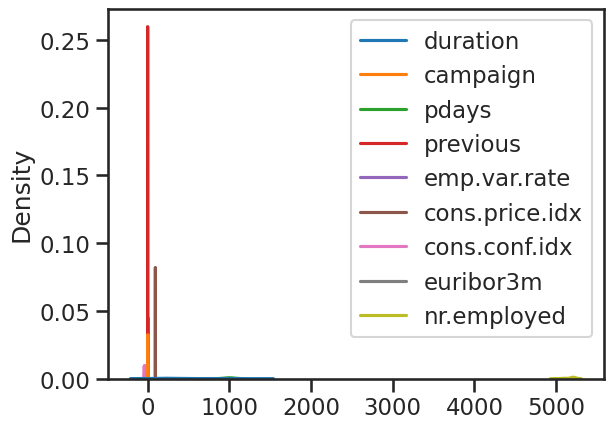

In [90]:
sb.kdeplot(set_Input)

<AxesSubplot:ylabel='Density'>

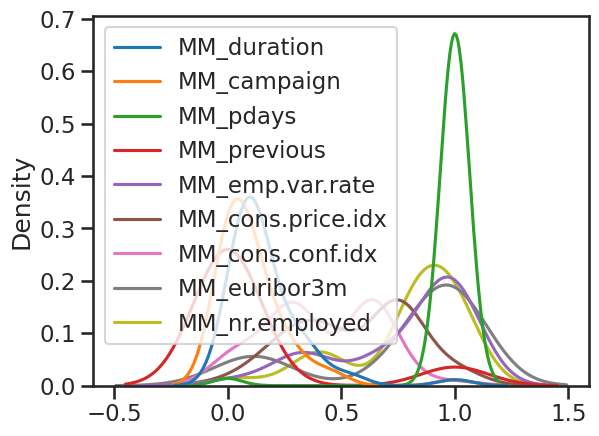

In [91]:
sb.kdeplot(set_Norm_MM)

<AxesSubplot:ylabel='Density'>

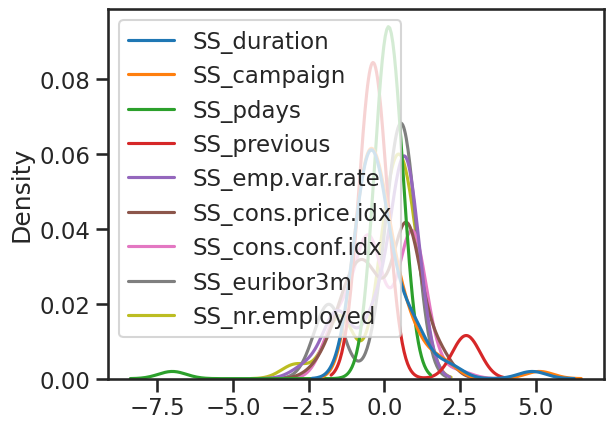

In [92]:
sb.kdeplot(set_Norm_SS)

In [93]:
set_Norm_SS.describe()

,SS_duration,SS_campaign,SS_pdays,SS_previous,SS_emp.var.rate,SS_cons.price.idx,SS_cons.conf.idx,SS_euribor3m,SS_nr.employed
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-9.547918e-17,1.176836e-16,-2.930989e-16,1.776357e-17,8.659740e-17,1.509681e-14,-6.594725e-16,-2.592371e-16,6.972201e-15
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-9.989660e-01,-6.744694e-01,-7.000000e+00,-3.692745e-01,-2.702083e+00,-2.197572e+00,-1.715894e+00,-2.154055e+00,-3.008196e+00
25%,-5.429808e-01,-6.744694e-01,1.428571e-01,-3.692745e-01,-3.076486e-01,-7.624436e-01,-6.431554e-01,8.035983e-02,1.744428e-01
50%,-3.539137e-01,-1.475402e-01,1.428571e-01,-3.692745e-01,5.630549e-01,1.406465e-01,-4.237316e-01,5.878817e-01,2.582424e-01
75%,1.663296e-01,3.793890e-01,1.428571e-01,-3.692745e-01,7.807308e-01,7.963684e-01,8.928108e-01,6.561006e-01,8.221438e-01
max,4.888063e+00,5.121752e+00,1.428571e-01,2.708013e+00,7.807308e-01,1.721054e+00,2.428777e+00,6.610440e-01,8.221438e-01


In [94]:
setFinal = pd.concat([setClean, set_Norm_SS], axis = 1)

In [95]:
setFinal.head(5)

,Unnamed: 0,id,age,job,marital,education,default,housing,contact,month,...,nr.employed,SS_duration,SS_campaign,SS_pdays,SS_previous,SS_emp.var.rate,SS_cons.price.idx,SS_cons.conf.idx,SS_euribor3m,SS_nr.employed
0,2292,2292,51 years,entrepreneur,divorced,university degree,no,yes,telephone,may,...,5099.1,-0.193269,-0.674469,0.142857,2.708013,-1.541145,-1.365158,-1.496470,-1.757265,-1.429970
1,1536,1536,37 years,management,married,university degree,no,yes,cellular,august,...,5228.1,-0.035095,-0.147540,0.142857,-0.369274,0.780731,-0.283413,0.965952,0.661044,0.822144
2,4047,4047,38 years,blue-collar,married,basic 4y,,no,telephone,june,...,5228.1,-0.865507,-0.147540,0.142857,-0.369274,0.780731,1.721054,-0.423732,0.655112,0.822144
3,3862,3862,40 years,technician,married,professional course,no,yes,cellular,november,...,5017.5,1.111665,-0.674469,-7.000000,2.708013,-2.702083,-1.844188,2.428777,-2.142850,-2.854563
4,1340,1340,32 years,admin.,married,university degree,no,yes,cellular,august,...,5228.1,0.780489,0.906318,0.142857,-0.369274,0.780731,-0.283413,0.965952,0.658408,0.822144


In [96]:
setFinal.describe(include = "all")

,Unnamed: 0,id,age,job,marital,education,default,housing,contact,month,...,nr.employed,SS_duration,SS_campaign,SS_pdays,SS_previous,SS_emp.var.rate,SS_cons.price.idx,SS_cons.conf.idx,SS_euribor3m,SS_nr.employed
count,50.000000,50.000000,50,50,50,50,50,50,50,50,...,50.00000,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
unique,NaN,NaN,21,8,3,7,2,3,3,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,40 years,blue-collar,married,university degree,no,yes,cellular,may,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,9,13,29,15,37,27,26,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2461.900000,2461.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5181.00800,-9.547918e-17,1.176836e-16,-2.930989e-16,1.776357e-17,8.659740e-17,1.509681e-14,-6.594725e-16,-2.592371e-16,6.972201e-15
std,1047.344129,1047.344129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57.86105,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,257.000000,257.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5008.70000,-9.989660e-01,-6.744694e-01,-7.000000e+00,-3.692745e-01,-2.702083e+00,-2.197572e+00,-1.715894e+00,-2.154055e+00,-3.008196e+00
25%,1553.750000,1553.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5191.00000,-5.429808e-01,-6.744694e-01,1.428571e-01,-3.692745e-01,-3.076486e-01,-7.624436e-01,-6.431554e-01,8.035983e-02,1.744428e-01
50%,2486.000000,2486.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5195.80000,-3.539137e-01,-1.475402e-01,1.428571e-01,-3.692745e-01,5.630549e-01,1.406465e-01,-4.237316e-01,5.878817e-01,2.582424e-01
75%,3407.000000,3407.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5228.10000,1.663296e-01,3.793890e-01,1.428571e-01,-3.692745e-01,7.807308e-01,7.963684e-01,8.928108e-01,6.561006e-01,8.221438e-01


## 5.- Generar archivo de salida en formato csv o excel:


Para finalizar utilizo las funciones "to_csv" y "to_html" de pandas para generar el archivo de salida en formatos csv y html respectivamente, el archivo csv se especifica que la separación de por coma.

In [97]:
setFinal.to_csv("Bank_Marketing.CSV", sep = ",")

In [98]:
setFinal.to_html("Bank_Marketing1.html")